# Bay Wheels's trip data set
## by Abdulrahman Alsalem

## Investigation Overview

> My interest to find what are the main characteristics for the majority duration trips.

## Dataset Overview

> 447631 bike trips information; inculdes 15 features. 
<br> 3 features about the trip: Duration, Start and End of (Time & Date) 
<br> 4 features about the start station: ID, Name, Latitude, Longitude. 
<br> 4 features about the end station: ID, Name, Latitude, Longitude. 
<br> 3 features about the rider: User Type (Subscriber or Customer), Year of Birth, Gender. 
<br> one about the bike: ID.

In [18]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [19]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [20]:
# change from seconds to minutes to easier understanding.
df['duration_sec'] = df['duration_sec']/60

In [21]:
# drop the outliers.
df = df[df['duration_sec'] < 60]
df = df[df['member_birth_year'] > 1940]
df = df[df['member_gender'] != 'Other']

## Distribution of durations.

> We can conclude that our main durations are between 1-10 minutes, normal distribution, and this is our data that we will investigate it's characteristics more.

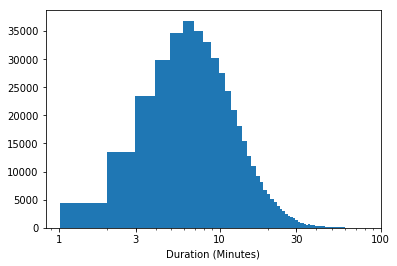

In [22]:
plt.hist(data = df, x = 'duration_sec', bins= 60)
ticks = [1, 3, 10, 30, 100]
lables = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xlabel('Duration (Minutes)')
plt.xticks(ticks, lables)
plt.show()

In [23]:
df2 = df[df['duration_sec'] < 10]

## Relationship between variables.

> we can predict if the rider is female the duration will be more than 5 minutes, and the most of our customers will spend 8-10 minutes.
<br> > most of our riders are 23-33 years old.

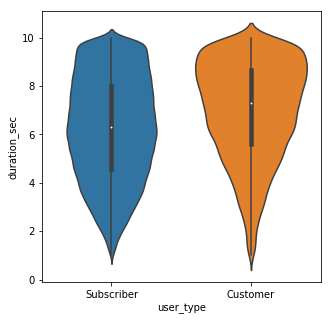

In [24]:
plt.figure(figsize = [5, 5])
sb.violinplot(data = df2, x = 'user_type', y = 'duration_sec')
plt.show()

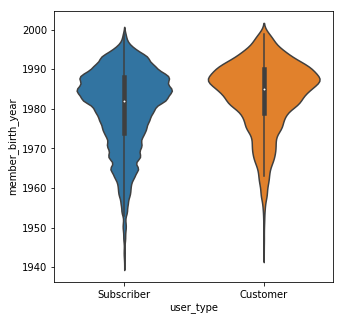

In [25]:
plt.figure(figsize = [5, 5])
sb.violinplot(data = df2, x = 'user_type', y = 'member_birth_year')
plt.show()

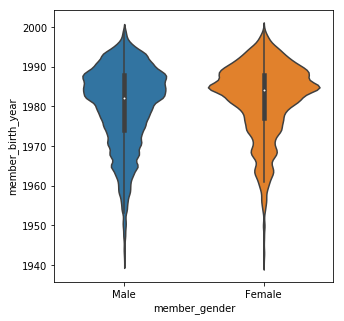

In [26]:
plt.figure(figsize = [5, 5])
sb.violinplot(data = df2, x = 'member_gender', y = 'member_birth_year')
plt.show()

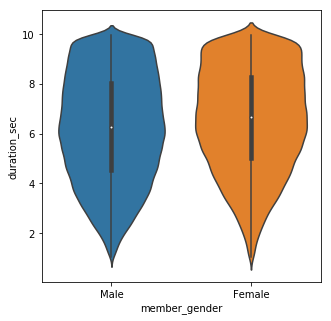

In [27]:
plt.figure(figsize = [5, 5])
sb.violinplot(data = df2, x = 'member_gender', y = 'duration_sec')
plt.show()

## Duration and Ages and User Types

> Most of females riders are younger than males riders. subscribers spend less time than customers.
<br> Subscribers are older than customers.

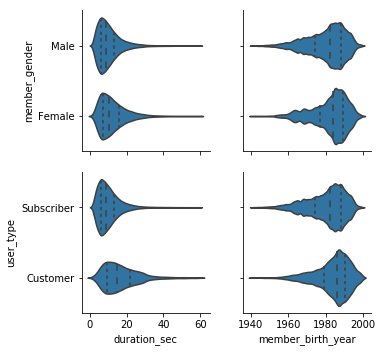

In [28]:
g = sb.PairGrid(data = df, x_vars = ['duration_sec', 'member_birth_year'],
                y_vars = ['member_gender','user_type'])
g.map(sb.violinplot, inner = 'quartile')

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!